
Instructions for students:

Since this notebook is shared, any changes you make will not be saved unless you create your own copy of this notebook in your google drive. To do this, click on 'File' and click 'Save a copy in Drive'. A new tab will open that will point to your own local copy of this notebook. You can now make changes and your modifications would be saved in your own google drive.

Run each cell in this notebook, one by one, reading the comment above the cell first. This will aid in understanding what the code is doing.

After running all cells, try experimenting with the network architecture. Try adding more layers or changing the number of units in the layer. Can you increase the performance of the model?

# Regression Example in Tensorflow : Predicting house prices

### The Boston Housing Price dataset

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. The attributes are deﬁned as follows (taken from the UCI Machine Learning Repository1):

*   CRIM: per capita crime rate by town.
*   ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
*   INDUS: proportion of non-retail business acres per town.
*   CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
*   NOX: nitric oxides concentration (parts per 10 million).
*   RM: average number of rooms per dwelling.
*   AGE: proportion of owner-occupied units built prior to 1940.
*   DIS: weighted distances to ﬁve Boston employment centers.
*   RAD: index of accessibility to radial highways.
*   TAX: full value property tax rate per 10000 dollars.
*   PTRATIO: pupil-teacher ratio by town.
*   MEDV: Median value of owner-occupied homes in $1000s.

We can see that the input attributes have a mixture of units.


**Loading the Boston housing dataset**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.datasets import boston_housing

tf.random.set_seed(1234)
np.random.seed(1234)

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


We can see from the output of the below cell, the training dataset contains 404 records/rows/samples and 13 columns/features.

In [2]:
train_data.shape

(404, 13)

The test dataset contains 102 samples and 13 features:

In [3]:
test_data.shape

(102, 13)

The target values (ground-truths) are the median values of homes, represented in thousands of dollars. i.e. 15.2 = $15200 (These were the prices back in the 70's).

In [4]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

Looking at the first sample row in the training dataset:

In [5]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

### Preparing the data

We observer that the dataset is entirely numerical.

**Normalizing the data**

Normalizing data is a crucial step in preparing datasets for machine learning models. It involves adjusting the scale of the features to ensure that they have a similar range. This process is important because many machine learning algorithms perform better when the input features are on a similar scale. Normalization helps prevent features with larger scales from dominating those with smaller scales during the training process.

The most common normalisation method is feature-wise normalisation:

This method scales the data so that it has a mean of 0 and a standard deviation of 1.
For each feature in the input data, we subtract the mean and divide by the standard deviation i.e., the feature is centered around zero and has a unit standard deviation.

Note: The quantities for normalising the test data comes from the training data as shown below:

In [6]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

### Building your model

**Model definition**

We use a small model with just two intermediate layers with 64 unites each. Genreally, the less training data you have, the worse it overfits. In practice, one way to mitigate overfitting is to use a smaller model.

Observe the last layer(output layer) has a single unit with no activation. In tensorflow, when there is no activation specified, it defaults to linear. This is a standard setup for scalar regression where you are trying to predict a single continuous value.

The loss function of the model is the mean squared error(MSE) function (the square of the difference between the predictions and targets), and the metric we are evaulating is the mean absolute error(MAE). This is the absolute value between the precitions and the targets. Example, if the MAE value between a prediction and target is 0.3, it means that your prediction is off by $300.


**Dense Layers**

Dense layers, also known as fully connected layers, are a fundamental component of artificial neural networks (ANNs). In a dense layer, each neuron or node in the layer is connected to every neuron in the preceding layer. This means that each neuron receives input from all the neurons in the previous layer and computes its output using a weighted sum of those inputs, followed by an activation function.

Here's a breakdown of how a dense layer operates:

    Input: Each neuron in the dense layer receives input from all the neurons in the preceding layer. If the preceding layer has n neurons, then each neuron in the dense layer receives n inputs.

    Weights: Each input to a neuron is associated with a weight. These weights determine the strength of the connection between the neurons. The weights are learned during the training process through techniques like gradient descent.

    Weighted Sum: The inputs are multiplied by their corresponding weights, and the results are summed up. This computation can be represented mathematically as:
    weighted_sum=∑i=1ninputi×weightiweighted_sum=∑i=1n​inputi​×weighti​

    Bias: A bias term is often added to the weighted sum before applying the activation function. The bias term allows the model to capture shifts in the data that are independent of the input features.

    Activation Function: The weighted sum (optionally plus bias) is passed through an activation function, which introduces non-linearity to the output of the neuron. Common activation functions include sigmoid, tanh, ReLU (Rectified Linear Unit), and softmax.

The output of a dense layer is typically a vector, with each element representing the output of one neuron in the layer. Dense layers are versatile and can be used in various neural network architectures, including feedforward neural networks (where layers are arranged sequentially), convolutional neural networks (CNNs), and recurrent neural networks (RNNs). They are often used in the final layers of a network for tasks such as classification or regression.

**ReLU**

ReLU (Rectified Linear Unit) is an activation function commonly used in artificial neural networks. It introduces non-linearity to the output of neurons, allowing neural networks to learn complex patterns and relationships in data. The ReLU function is defined as:

f(x)=max⁡(0,x)f(x)=max(0,x)

In other words, the output of the ReLU function is the maximum of 0 and the input xx. Visually, this function looks like a ramp, where any negative input is flattened to 0, while positive inputs remain unchanged.

Here are some key characteristics of the ReLU activation function:

    Simplicity: ReLU is simple and computationally efficient. It avoids the computational cost associated with more complex activation functions like sigmoid or tanh.

    Sparsity: ReLU introduces sparsity in the network because any negative input is mapped to 0. This sparsity can be beneficial for regularization, as it helps prevent overfitting by reducing the co-adaptation of neurons.

    Non-linearity: Although ReLU is a linear function for positive inputs, it introduces non-linearity overall. This non-linearity is crucial for enabling neural networks to approximate complex functions.

    Vanishing Gradient: ReLU helps alleviate the vanishing gradient problem, which can occur with activation functions like sigmoid and tanh. The gradient of ReLU is 1 for positive inputs, which prevents the gradients from becoming too small during backpropagation.

In [18]:
def build_model():
    model = keras.Sequential([
        layers.Dense(13, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

### Validating your approach using K-fold validation

**K-fold validation**

K-fold cross-validation is a technique used in machine learning to assess the performance and generalization ability of a model. It's particularly useful when you have a limited amount of data and want to maximize the use of available samples for both training and testing.

Here's how k-fold cross-validation works:

    Dividing the Dataset: First, the dataset is divided into k equal-sized subsets or folds.

    Training and Testing: The cross-validation process then iterates through k rounds. In each round, one of the k subsets is used as the test set, and the remaining k-1 subsets are used as the training set.

    Model Training and Evaluation: The model is trained on the training set and evaluated on the test set. This process is repeated k times, each time using a different fold as the test set and the remaining folds as the training set.

    Performance Evaluation: Once all rounds are completed, the performance metrics (such as accuracy, precision, recall, etc.) from each iteration are averaged to obtain a single performance estimate for the model.

    Final Model: After cross-validation, if the performance is satisfactory, the model can be trained on the entire dataset using the selected hyperparameters or model architecture.

The key advantages of k-fold cross-validation include:

    More Reliable Performance Estimate: By averaging the performance across multiple iterations, k-fold cross-validation provides a more reliable estimate of the model's performance compared to a single train-test split.

    Better Utilization of Data: Each data point is used for both training and testing in different iterations, maximizing the use of available data for model evaluation.

    Reduced Variance: Since the model is evaluated multiple times on different subsets of the data, the variance in the performance estimate is reduced, leading to a more stable evaluation.

The choice of k (the number of folds) depends on factors such as the size of the dataset and computational resources. Common choices for k include 5, 10, or even higher numbers for smaller datasets. However, as k increases, the computational cost also increases since the model needs to be trained and evaluated k times.

In [19]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


Observe the scores from each of the k-fold runs.
We're using MAE, so the lower is better.
For example, for the first score, the MAE is 1.9664...
This means that across all predictions, your model is off by $1966.4

In [20]:
all_scores

[2.292691469192505, 2.453836679458618, 2.5215258598327637, 2.378781795501709]

We then tale the average of the MAE scores for all folds:

In [21]:
np.mean(all_scores)

2.411708950996399

**Saving the validation logs at each fold**

In [22]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


**Building the history of successive mean K-fold validation scores**

In [12]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

**Plotting validation scores**

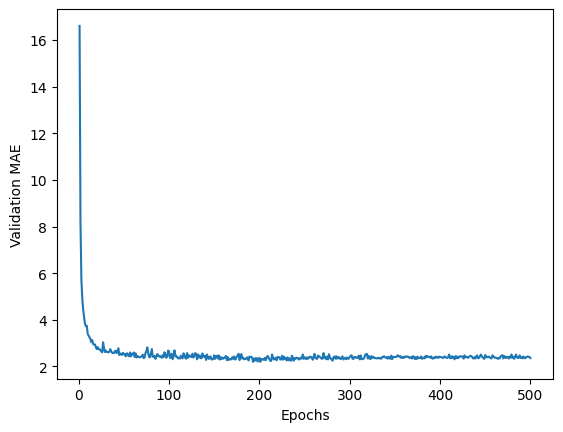

In [23]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

It is difficult to tell what is happening is the above graph. This is due to a few values affecting the overall scale of the graph. In general, we expect that the model could perform poorly in the first few epochs. So lets exclude this in the graph below.

**Plotting validation scores, excluding the first 10 data points**

Now we can see more cleary what is the model is doing during training/learning. We observe that the model doesn't improve much after 120 to 140 epochs, after that the model starts overfitting.

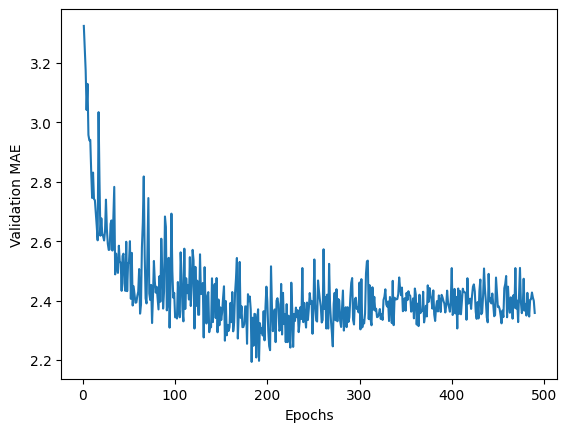

In [24]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Training the final model**

Only when you have finished tuning the hyper parameters of your model (including number of epochs and adjusting the layers), you can then train(with the best hyper-parameters) a final model for production on all of the training data, and then observe its performance on the test data.

In [25]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 3ms/step - loss: 15.5714 - mae: 2.6328


In [26]:
test_mae_score

2.632781982421875

We see that the final model is off by about $2500.
See if you can achieve a lower test error.

### Generating predictions on new data

In [27]:
predictions = model.predict(test_data)
predictions[0]

4/4 [==============================] - 0s 3ms/step


array([6.977331], dtype=float32)